In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

In [2]:
dataset_train = pd.read_csv('../../data/modified/addFeatureTrain.csv')
dataset_test = pd.read_csv('../../data/modified/addFeatureTest.csv')

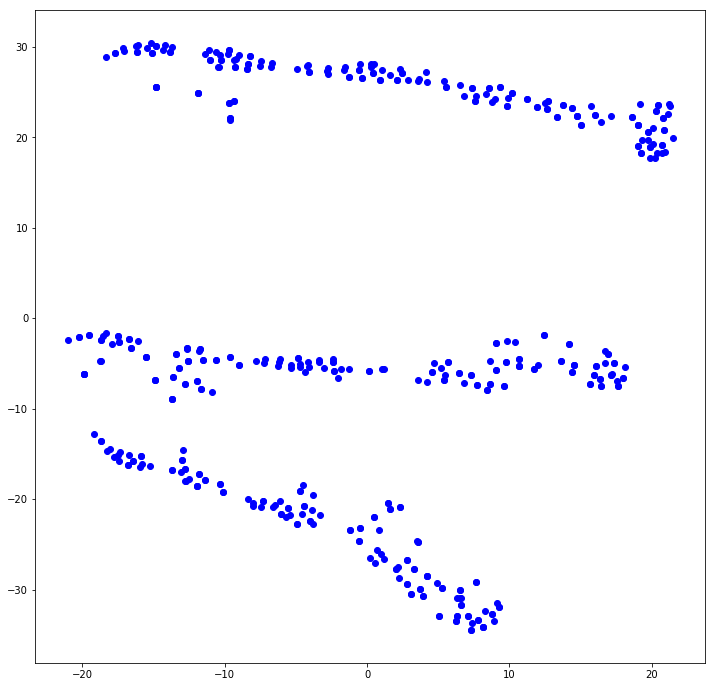

In [3]:
dados = dataset_train.iloc[:500, :280]

from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (12, 12)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

for xis in range(len(graf)):
    plt.scatter(graf[xis][0], graf[xis][1], c='blue')
plt.show()

In [4]:
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 361 entries, V1 to V101_V143_V213_V232_V246
dtypes: float64(361)
memory usage: 144.3 MB
None


In [5]:
x_train = dataset_train.drop(columns=['y'])
y_train = dataset_train['y']

x_test = dataset_test.drop(columns=['y'])
y_test = dataset_test['y']

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100)

init = time.time()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(gbr.score(x_test, y_test)))
print(cross_val_score(gbr,x_test, y_test,scoring='r2'))
print('MAE {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 45.28918409347534 seconds
R2 score: 0.6347378170248149
[0.66349809 0.62534879 0.64038213]
MAE 0.37395592870328376


In [12]:
from sklearn.model_selection import cross_validate
cv = cross_validate(gbr, x_test, y_test, cv=5)
print(cv)

{'fit_time': array([4.99626613, 4.76952052, 4.84853101, 4.85355163, 4.82025743]), 'score_time': array([0.00871301, 0.00876141, 0.00874949, 0.00820041, 0.00927162]), 'test_score': array([0.66798773, 0.64667667, 0.62341988, 0.62423928, 0.65129736]), 'train_score': array([0.73158309, 0.73177161, 0.7410149 , 0.732862  , 0.74180759])}


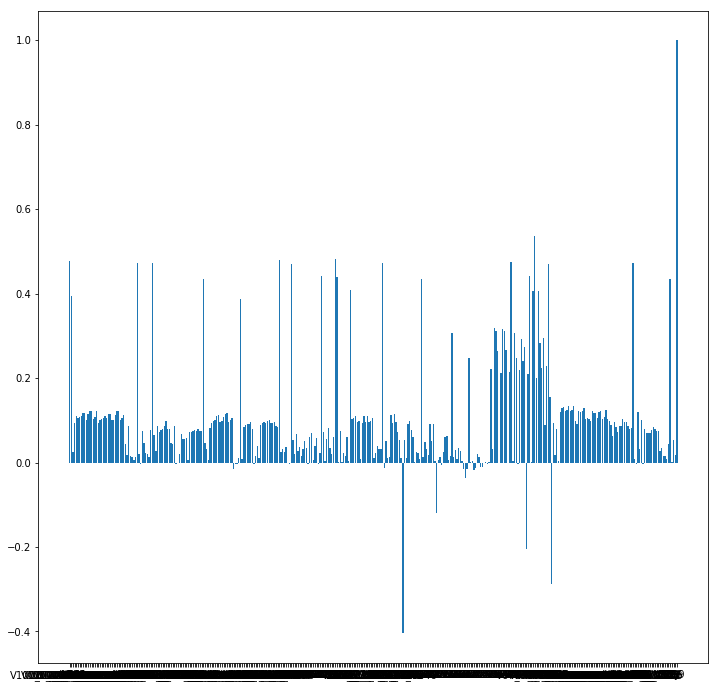

In [9]:
y_aux = dataset_train.corr()["y"] # individual correlation, variables with target
x_aux = dataset_train.columns
plt.bar(x_aux[0:len(y_aux)-1], y_aux[0:len(y_aux)-1])
plt.show()